# Data Importing and Data Cleaning

This notebook will mainly cover the steps I've taken to import and clean the datasets from Kaggle. For more detailed descriptions on the problem statement and methodology of my Capstone Project, please refer to the `Part 2` Jupyter Notebook in this Repository.

In [1]:
# Importing Basic Packages

import json
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm, tqdm_notebook, tnrange

# Display Settings

pd.set_option('display.max_columns', 50)

From the Kaggle Dataset, the 3 main json files that I will be importing and analyzing for my Capstone Project are the `business`, `review` and `user` files.

### Business File

In [2]:
# Importing Yelp Business JSON File

business = []

with open("Data/Kaggle/yelp_academic_dataset_business.json") as f:
    for line in f:
        business.append(json.loads(line))

# Length of rows of Data

len(business)  # 209,393 rows of business

209393

In [3]:
# Overview of columns of each entry of business file

business[0]

{'business_id': 'f9NumwFMBDn751xgFiRbNA',
 'name': 'The Range At Lake Norman',
 'address': '10913 Bailey Rd',
 'city': 'Cornelius',
 'state': 'NC',
 'postal_code': '28031',
 'latitude': 35.4627242,
 'longitude': -80.8526119,
 'stars': 3.5,
 'review_count': 36,
 'is_open': 1,
 'attributes': {'BusinessAcceptsCreditCards': 'True',
  'BikeParking': 'True',
  'GoodForKids': 'False',
  'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
  'ByAppointmentOnly': 'False',
  'RestaurantsPriceRange2': '3'},
 'categories': 'Active Life, Gun/Rifle Ranges, Guns & Ammo, Shopping',
 'hours': {'Monday': '10:0-18:0',
  'Tuesday': '11:0-20:0',
  'Wednesday': '10:0-18:0',
  'Thursday': '11:0-20:0',
  'Friday': '11:0-20:0',
  'Saturday': '11:0-20:0',
  'Sunday': '13:0-18:0'}}

Now that we know the column names of this file, we now can proceed to create our dataframe for this file.

In [4]:
## Creating Dataframe for business json file

# Creating Columns for our Dataframe

business_id = []
city = []
state = []
stars = []
review_count = []
categories = []
postal_code = []
latitude = []
longitude = []
pricerange = []
is_open = []
name = []

# Iterating through each row of the json file

for entry in range(0, len(business)): 
        business_id.append(business[entry]['business_id'])
        name.append(business[entry]['name'])
        city.append(business[entry]['city'])
        state.append(business[entry]['state'])
        stars.append(business[entry]['stars'])
        postal_code.append(business[entry]['postal_code'])
        review_count.append(business[entry]['review_count'])
        categories.append(business[entry]['categories'])
        latitude.append(business[entry]['latitude'])
        longitude.append(business[entry]['longitude'])
        is_open.append(business[entry]['is_open'])


business = {'business_id ':business_id,'name':name,'city':city,'state':state,'stars':stars,'review_count':review_count,
        'categories':categories,'latitude':latitude,'longitude':longitude,'is_open':is_open, 'postal_code':postal_code}

business_df  = pd.DataFrame(business)

# Overview of our Business Dataframe

print(business_df.shape) # 209,393 rows of Data
business_df.head()

(209393, 11)


,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,Cornelius,NC,3.5,36,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",35.462724,-80.852612,1,28031
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD",Scottsdale,AZ,5.0,4,"Health & Medical, Fitness & Instruction, Yoga,...",33.569404,-111.890264,1,85258
2,XNoUzKckATkOD1hP6vghZg,Felinus,Montreal,QC,5.0,5,"Pets, Pet Services, Pet Groomers",45.479984,-73.580070,1,H4C 1P4
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,North Las Vegas,NV,2.5,3,"Hardware Stores, Home Services, Building Suppl...",36.219728,-115.127725,0,89030
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,Mesa,AZ,4.5,26,"Home Services, Plumbing, Electricians, Handyma...",33.428065,-111.726648,1,85205


In [5]:
# Overview of Business/Restaurant Categories

business_categories = business_df.assign(categories = business_df.categories.str.split(', ')).explode('categories')

print(str('The number of unique business categories is:'), len(business_categories))

# Most Common Business Categories

business_categories.categories.value_counts().head(25)

The number of unique business categories is: 873318


Restaurants                  63944
Shopping                     34644
Food                         32991
Home Services                22487
Beauty & Spas                20520
Health & Medical             19227
Local Services               15783
Automotive                   14720
Nightlife                    14211
Bars                         12400
Event Planning & Services    11263
Active Life                  10225
Coffee & Tea                  8415
Fashion                       8374
Fast Food                     8106
Sandwiches                    8064
American (Traditional)        7596
Home & Garden                 7331
Hair Salons                   7303
Pizza                         7302
Professional Services         6923
Arts & Entertainment          6802
Doctors                       6767
Auto Repair                   6657
Real Estate                   6435
Name: categories, dtype: int64

For this Capstone Project, we are only focusing on Restaurant and F&B Businesses. As such, we will be restricting the categories that businesses can contain in our filtered dataset. Based on the above count plot, we will be restricting these broad categories to: `Restaurants`, `Fast Food`, `Breakfast & Brunch`, `Cafes`.

In [6]:
# Filtering for Restaurant Food Businesses

business_food = business_df[business_df['categories'].str.contains('Restaurants|Fast Food|Breakfast & Brunch|Cafes',
                case=False, na=False)]

# Filtering only for Restaurants that are still open for business, open = 1, closed = 0

business_food = business_food[business_food['is_open']==1]
business_food.head()

,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,Champaign,IL,4.5,5,"Ethnic Food, Food Trucks, Specialty Food, Impo...",40.110446,-88.233073,1,61820
24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,Aurora,ON,4.5,4,"Restaurants, Cheesesteaks, Poutineries",44.010962,-79.448677,1,L4G 7J1
25,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,Thornhill,ON,4.5,7,"Japanese, Fast Food, Food Court, Restaurants",43.820492,-79.398466,1,L3T 5W4
30,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,Richmond Hill,ON,3.0,3,"Persian/Iranian, Turkish, Middle Eastern, Rest...",43.947011,-79.454862,1,L4E 1A5
33,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,Phoenix,AZ,4.0,10,"Food, Pretzels, Bakeries, Fast Food, Restaurants",33.602822,-111.983533,1,85032


In [7]:
# Checking how many rows of data we have left: 44,023 rows of Data (Restaurant/Food Businesses)

business_food.shape

(44023, 11)

### Deciding which City to Focus on

In [8]:
# Top States that have the most number of Restaurant Businesses in this dataset

top_states = business_food['state'].value_counts().head(10)
top_states

ON    11100
AZ     7889
NV     5321
QC     4680
OH     4350
NC     3319
PA     3013
AB     2376
WI     1185
IL      461
Name: state, dtype: int64

The State of Ontario **(ON)** in Canada has the most number of Restaurant Businesses in this dataset.

In [9]:
# Top Cities that have the most number of Restaurant Businesses in this dataset

top_cities = business_food['city'].value_counts().head(20)
top_cities

Toronto        5472
Las Vegas      4386
Montréal       2886
Phoenix        2773
Calgary        2275
Charlotte      2034
Pittsburgh     1750
Mississauga    1253
Cleveland      1075
Scottsdale      949
Mesa            849
Madison         741
Tempe           661
Markham         612
Henderson       604
Chandler        566
Glendale        524
Brampton        500
Gilbert         427
Scarborough     413
Name: city, dtype: int64

The City of **Toronto** has the most number of Restaurant Businesses in this dataset.

For this Capstone Project, I've decided to focus on the Canadian City of Toronto, as the main goal is to produce a **Recommendation System for Food Restaurants**. Focusing on multiple cities or states in our recommendation systems could potentially complicate things as people would not want to travel to different cities just to try new restaurants.

In [10]:
# Keeping the Canadian State of Ontario

states_to_keep = ['ON']
business_food = business_food[business_food.state.isin(states_to_keep)]

# Overview of Canadian Cities in these 3 States that have the most number of Restaurant Businesses in this dataset

business_food['city'].value_counts().head(20)

Toronto          5471
Mississauga      1253
Markham           611
Brampton          500
Scarborough       413
Vaughan           400
Richmond Hill     356
North York        347
Etobicoke         255
Newmarket         165
Oakville          149
Ajax              145
Pickering         141
Whitby            134
Thornhill         127
Aurora            106
Woodbridge         79
York               45
Concord            35
East York          34
Name: city, dtype: int64

In [11]:
# Checking how many rows of data we have left: 11,100 rows of Data (Restaurant/Food Businesses)

business_food.shape

(11100, 11)

In [12]:
# Check for null values

business_food.isnull().sum()

business_id     0
name            0
city            0
state           0
stars           0
review_count    0
categories      0
latitude        0
longitude       0
is_open         0
postal_code     0
dtype: int64

For our initial `business_food` dataset, we have **11,100 rows of business data** for **11,100 respective Restaurant/Food Businesses** in the city of `Toronto`.

### Review File

In [13]:
# Importing Review JSON File

reviews = []

with open('Data/Kaggle/yelp_academic_dataset_review.json') as f:
    for line in f:
        reviews.append(json.loads(line))

# Length of rows of Data        

len(reviews)  # 8,021,122 reviews

8021122

In [14]:
# Overview of columns of each entry of the Review file

reviews[0]

{'review_id': 'xQY8N_XvtGbearJ5X4QryQ',
 'user_id': 'OwjRMXRC0KyPrIlcjaXeFQ',
 'business_id': '-MhfebM0QIsKt87iDN-FNw',
 'stars': 2.0,
 'useful': 5,
 'funny': 0,
 'cool': 0,
 'text': 'As someone who has worked with many museums, I was eager to visit this gallery on my most recent trip to Las Vegas. When I saw they would be showing infamous eggs of the House of Faberge from the Virginia Museum of Fine Arts (VMFA), I knew I had to go!\n\nTucked away near the gelateria and the garden, the Gallery is pretty much hidden from view. It\'s what real estate agents would call "cozy" or "charming" - basically any euphemism for small.\n\nThat being said, you can still see wonderful art at a gallery of any size, so why the two *s you ask? Let me tell you:\n\n* pricing for this, while relatively inexpensive for a Las Vegas attraction, is completely over the top. For the space and the amount of art you can fit in there, it is a bit much.\n* it\'s not kid friendly at all. Seriously, don\'t bring them.

Now that we know the column names of this file, we now can proceed to create our dataframe for this file.

In [15]:
## Creating Dataframe for review json file

# Creating Columns for Dataframe

reviewid = []
businessid= []
userid = []
stars = []
useful = []
funny = []
cool = []
text = []
date = []

# Iterating through each row of the json file

for entry in range(0, len(reviews)):     
    reviewid.append(reviews[entry]['review_id'])
    businessid.append(reviews[entry]['business_id'])
    userid.append(reviews[entry]['user_id'])
    stars.append(reviews[entry]['stars'])
    text.append(reviews[entry]['text'])
    date.append(reviews[entry]['date'])
    useful.append(reviews[entry]['useful'])
    funny.append(reviews[entry]['funny'])
    cool.append(reviews[entry]['cool'])
    
reviews = {'review_id':reviewid,'business_id':businessid,'user_id':userid,'stars':stars,'useful':useful,'funny':funny,
           'cool':cool,'text':text,'date':date}

reviews_df  = pd.DataFrame(reviews)

# Overview of our Review Dataframe

print(reviews_df.shape)
reviews_df.head()

(8021122, 9)


,review_id,business_id,user_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,-MhfebM0QIsKt87iDN-FNw,OwjRMXRC0KyPrIlcjaXeFQ,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,lbrU8StCq3yDfr-QMnGrmQ,nIJD_7ZXHq-FX8byPMOkMQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,HQl28KMwrEKHqhFrrDqVNQ,V34qejxNsCbcgD8C0HVk-Q,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,5JxlZaqCnk1MnbgRirs40Q,ofKDkJKXSKZXu5xJNGiiBQ,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,IS4cv902ykd8wj1TR0N3-A,UgMW8bLE0QMJDCkQ1Ax5Mg,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [16]:
# Splitting Date Column into Year, Month and Time Columns

def create_yr(x): 
    return x.split('-')[0] 

def create_mth(x): 
    return x.split('-')[1] 

def create_time(x):
    return x.split(' ')[1]

reviews_df['year'] = reviews_df.date.apply(create_yr)
reviews_df['month'] = reviews_df.date.apply(create_mth)
reviews_df['time'] = reviews_df.date.apply(create_time)

# Overview of new df with 3 new columns

reviews_df.head()

,review_id,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
0,xQY8N_XvtGbearJ5X4QryQ,-MhfebM0QIsKt87iDN-FNw,OwjRMXRC0KyPrIlcjaXeFQ,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16,2015,04,05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,lbrU8StCq3yDfr-QMnGrmQ,nIJD_7ZXHq-FX8byPMOkMQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52,2013,12,03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,HQl28KMwrEKHqhFrrDqVNQ,V34qejxNsCbcgD8C0HVk-Q,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11,2015,12,03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,5JxlZaqCnk1MnbgRirs40Q,ofKDkJKXSKZXu5xJNGiiBQ,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52,2011,05,05:30:52
4,6TdNDKywdbjoTkizeMce8A,IS4cv902ykd8wj1TR0N3-A,UgMW8bLE0QMJDCkQ1Ax5Mg,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57,2017,01,21:56:57


In [17]:
# Checking how many rows of data we have: 8,021,122 rows of Data

reviews_df.shape

(8021122, 12)

### Filtered Reviews Dataset in Toronto

In [18]:
## Combining Business and Reviews Datasets
# Creating a new column for each business's unique ids

business_food['key'] = business_food.iloc[:,0]

# Keeping only the reviews for the restaurants in our selected dataset

restaurant_reviews = reviews_df[reviews_df['business_id'].isin(business_food['key'])]
restaurant_reviews = restaurant_reviews.reset_index().iloc[:,2:]
print(restaurant_reviews.shape)
restaurant_reviews.head()

(537557, 11)


,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
0,l-nL4BmhzpZjcavooO48PQ,HJECayULRM-6xh2GCCvLiA,4.0,2,1,1,ORDER In (Delivery) Review\n\nI discovered thi...,2015-10-17 01:38:13,2015,10,01:38:13
1,qUWqjjjfpB2-4P3He5rsKw,TZQSUDDcA4ek5gBd6BzcjA,4.0,0,0,0,"In the heart of Chinatown, I discovered it enr...",2017-06-06 19:04:10,2017,06,19:04:10
2,YJ2Y_asLIlbo-uijVugLow,Arf9ddxVvO3PsmdZlPBDyA,5.0,0,0,2,"As a spicy food fan, when I see a restaurant c...",2015-06-08 18:24:07,2015,06,18:24:07
3,9Eghhu_LzEJgDKNgisf3rg,iFEM16O5BeKvf_AHs6NzUQ,3.0,0,0,0,Was super excited to bring my boyfriend to thi...,2016-08-25 16:25:12,2016,08,16:25:12
4,eNFubUPJR7yIQah-NxZN_g,lMIm1Ye7BeVE21xqlImqEw,2.0,0,0,0,Decent food. Fishermen lobster or even congee ...,2017-05-26 01:20:43,2017,05,01:20:43


In [19]:
# Total of 537,557 Rows of Reviews for the selected Restaurant Businesses

restaurant_reviews.shape

(537557, 11)

In [20]:
# Number of Unique Users in this Reviews Dataset

n_users = len(restaurant_reviews.user_id.unique())
n_users #121,795 unique users in this review set

121795

In [21]:
# Sort Restaurant Reviews by Year

restaurant_sorted = restaurant_reviews.sort_values(by='year', ascending=True)
restaurant_sorted.head()

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
374494,3HVxkz03TS_ssJ7j3x5dRA,iNYJ-I_4AQfvnJQzXHv8hw,5.0,2,0,0,Originally an old mill from 1832 located in To...,2007-12-15 00:38:57,2007,12,00:38:57
318025,2Y-28XrkMeeA4FFvv_73tw,13xeC5yKJO4BDyQOI3xxDQ,4.0,4,0,0,I've been looking for a good Persian place dow...,2008-08-22 16:13:51,2008,08,16:13:51
441960,lyIHmlIK7PKwQeGyR8svJQ,b2z_tzR1pZci99i_cKLNGw,5.0,3,3,2,The panini here is reminiscent of those in Par...,2008-09-20 18:24:09,2008,09,18:24:09
501584,o19vbA9-BuvHXrE4nYJ60A,y3MNMa0SG_cHC1cwmmntpQ,4.0,0,0,0,"The Rebel House has some really, really great ...",2008-09-21 21:00:56,2008,09,21:00:56
380174,JK_DiDwbl7HX5OhCAh3h4g,BMmtD4a2uTyFxDJ2qHUbSw,2.0,1,0,0,"Now, I have not been to this place in quite so...",2008-12-27 02:17:27,2008,12,02:17:27


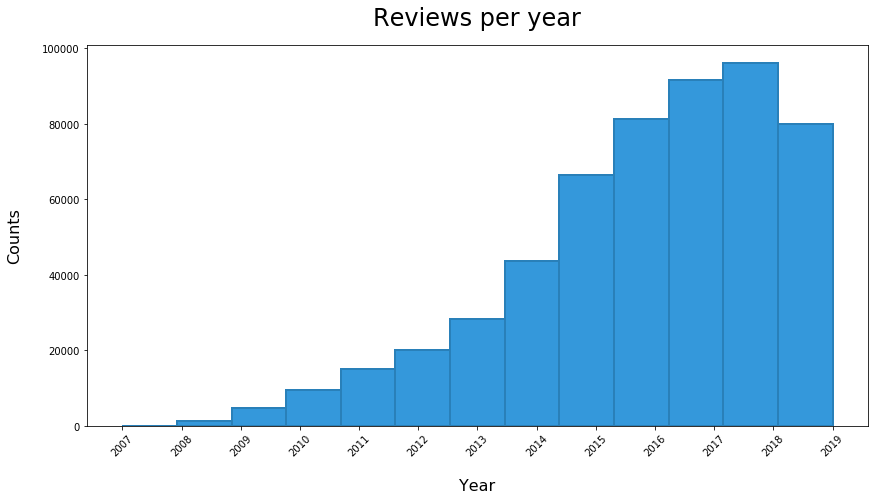

In [22]:
# Histogram plot of Restaurant Reviews per Year

def make_histogram(dataset, attribute, bins=13, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
        
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2) 
    plt.xticks(rotation=45)
    
make_histogram(restaurant_sorted, 'year', title='Reviews per year', xlab='Year', ylab='Counts')

The histogram has a left-skewed distribution with the majority of reviews being in the last 5 years of the dataset (2015-2019). For the purpose of this Capstone Project, I will only be analyzing reviews from the **past 5 years**.

In [23]:
# Filtering for Restaurant/Food Reviews from 2015-2019

restaurant_reviews['year'] = restaurant_reviews['year'].astype(int)
restaurant_reviews = restaurant_reviews[restaurant_reviews['year'] >= 2015]

# Overview of our Final Reviews Dataset, left with 415,038 rows of Data

print(restaurant_reviews.shape)
restaurant_reviews.head()

(415038, 11)


,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
0,l-nL4BmhzpZjcavooO48PQ,HJECayULRM-6xh2GCCvLiA,4.0,2,1,1,ORDER In (Delivery) Review\n\nI discovered thi...,2015-10-17 01:38:13,2015,10,01:38:13
1,qUWqjjjfpB2-4P3He5rsKw,TZQSUDDcA4ek5gBd6BzcjA,4.0,0,0,0,"In the heart of Chinatown, I discovered it enr...",2017-06-06 19:04:10,2017,06,19:04:10
2,YJ2Y_asLIlbo-uijVugLow,Arf9ddxVvO3PsmdZlPBDyA,5.0,0,0,2,"As a spicy food fan, when I see a restaurant c...",2015-06-08 18:24:07,2015,06,18:24:07
3,9Eghhu_LzEJgDKNgisf3rg,iFEM16O5BeKvf_AHs6NzUQ,3.0,0,0,0,Was super excited to bring my boyfriend to thi...,2016-08-25 16:25:12,2016,08,16:25:12
4,eNFubUPJR7yIQah-NxZN_g,lMIm1Ye7BeVE21xqlImqEw,2.0,0,0,0,Decent food. Fishermen lobster or even congee ...,2017-05-26 01:20:43,2017,05,01:20:43


In [24]:
# Checking for Null Values

restaurant_reviews.isnull().sum()

business_id    0
user_id        0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
year           0
month          0
time           0
dtype: int64

We have **415,038** rows of reviews data for Restaurants and Food outlets in the city of `Toronto`.

### User File

In [25]:
# Importing User JSON File

line_count = len(open("Data/Kaggle/yelp_academic_dataset_user.json").readlines())

# Creating Columns for Dataframe

users, names, review_counts, since, friends, useful, \
            funny, cool, n_fans, years_elite, average_stars = [], [], [], [], [], [], [], [], [], [], []

# Iterating through each row of the json file

with open("Data/Kaggle/yelp_academic_dataset_user.json") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        users += [blob["user_id"]]
        names += [blob["name"]]
        review_counts += [blob["review_count"]]
        since += [blob["yelping_since"]]
        friends += [blob["friends"]]
        useful += [blob["useful"]]
        funny += [blob["funny"]]
        cool += [blob["cool"]]
        n_fans += [blob["fans"]]
        average_stars += [blob["average_stars"]]

# Creating Dataframe for User json file

users_df = pd.DataFrame(
    {"user_id": users, 
     "user_name": names,
     "user_review_count": review_counts,
     "user_yelp_since": since,
     "friends": friends,
     "useful_reviews": useful,
     "funny_reviews": funny,
     "cool_reviews": cool,
     "n_fans": n_fans,
     "average_stars": average_stars
    }
)

100%|██████████| 1968703/1968703 [00:51<00:00, 37949.89it/s]


In [26]:
# Filtering for Active Yelp Users who have completed at least 5 reviews

users_df = users_df[users_df['user_review_count'] >= 5]

# Overview of our JSON Dataframe

print(users_df.shape)
users_df.sample(10)

(1047892, 10)


,user_id,user_name,user_review_count,user_yelp_since,friends,useful_reviews,funny_reviews,cool_reviews,n_fans,average_stars
261408,wzwyPHDR6bwf_iiQuDl0aw,Katrina,748,2008-08-21 06:30:18,"VBPLrOgCd7lWBJz-UfXISg, 7kpm96N3O-OnkGNxIdqqJA...",2403,1245,1948,75,3.85
194952,oYrKH2Now-qfaUCxpgaBwg,Amy,10,2013-12-13 12:52:30,None,6,0,1,0,4.18
207457,8ky0KNxVH68t4IkZ8WukrA,Patrick,47,2010-06-13 01:16:35,"ZZkqi-ulTw4kvSr2ywQ5mA, 6iz8JxvKOf8Gc86pMpfO_A...",43,15,12,2,4.43
595465,T8at9imfyLddZ0bueKGkvw,Sarah,13,2010-05-15 16:22:27,"eSx4K742fGzQTr7b6_7LCg, RrVGFLb2H0X6wUBCwsc22w...",14,8,10,3,4.62
1777569,NHNpCIxvHimTmYuycujbhA,Kit,133,2006-08-17 04:06:34,"298wIMkzIxjHKEgBXmZpOA, 29IH6EsYMVTnYICoc3XIUg...",381,174,257,33,3.84
106344,tHWrLTr_Sq3Osl4JAyoQGQ,Nick,18,2015-03-29 16:37:27,"tUAZRNQXGqEKkOxt3mTR0A, NPyC9B4ZTrpP51OIc1wRSA...",5,2,1,0,4.50
176544,qWiKtxvQhNKndwRaEx5CvQ,Marley,14,2013-06-08 16:52:25,None,12,0,1,0,3.14
1848441,b8Fh6GQgAY2yl35WJi2vvw,Elssa,5,2014-08-24 20:19:28,"yPaPLFzlC0PBMxh4cDRqtg, icOh55k2t8gHaxK7wtC2bQ...",2,0,0,0,4.40
136018,PT3GD403YC7pLPMZoE9m2g,Allen,33,2016-11-30 23:03:12,97GtXojQrF6sct0luiDZrA,10,4,2,0,3.19
852178,uNKCZa8PRhDi2NwCSYvoCw,Amy,22,2012-02-19 17:42:47,6xAW6w00N3SXwdBcSumG1g,14,4,4,0,4.12


In [27]:
# Number of unique active users in our user_df dataset

n_users = len(users_df.user_id.unique())
n_users # 1,047,892 unique active users

1047892

In [28]:
# Checking for Null Values

users_df.isnull().sum()

user_id              0
user_name            0
user_review_count    0
user_yelp_since      0
friends              0
useful_reviews       0
funny_reviews        0
cool_reviews         0
n_fans               0
average_stars        0
dtype: int64

### Finalizing Restaurants Business Dataset

In [29]:
# Number of Restaurant Businesses in the state of Ontario

business_food.state.value_counts()

ON    11100
Name: state, dtype: int64

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text xticklabel objects>)

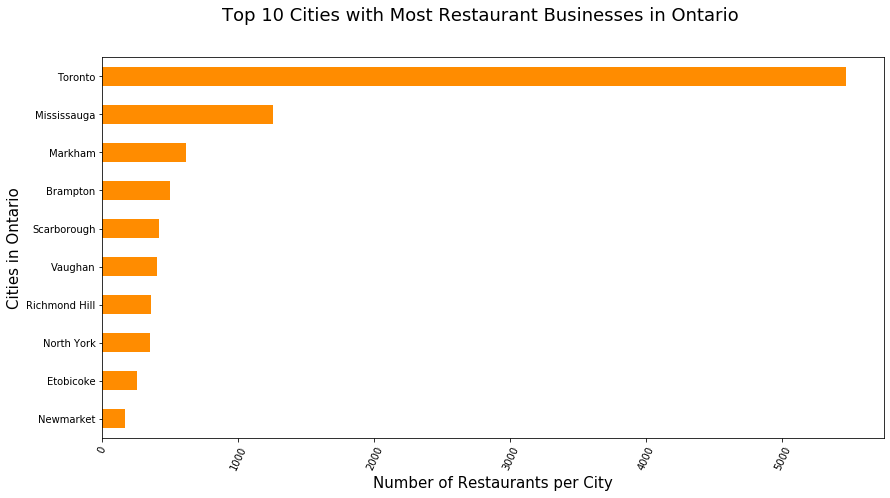

In [30]:
# Distribution of Cities with Most Restaurant Businesses in Ontario

#business_on = business_food[business_food['state']=='ON']
ontario_cities = business_food['city']
top_cities = ontario_cities.value_counts().head(10)
top_cities.sort_values(inplace=True)

fig, ax = plt.subplots(figsize=(14, 7), )
fig.suptitle('Top 10 Cities with Most Restaurant Businesses in Ontario', fontsize=18)

top_cities.plot(kind = 'barh', color= 'darkorange')

plt.ylabel('Cities in Ontario', fontsize=15)
plt.xlabel('Number of Restaurants per City', fontsize=15)
plt.xticks(rotation=65)

Based on the above plot, business data is heavily skewed with the city of `Toronto` having the majority of the business data. Hence, it will be more concise for me to focus just on the city of `Toronto` and drop the rest of the cities in the state of `Ontario`.

In [31]:
# Filtering for Restaurant Business Data in the city of Toronto

business_toronto = business_food[business_food['city'] == 'Toronto']
print(business_toronto.shape)
business_toronto.head()

(5471, 12)


,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
73,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,Toronto,ON,4.0,116,"Vietnamese, Restaurants",43.666376,-79.348773,1,M4M 1Y3,0QjROMVW9ACKjhSEfHqNCQ
110,8k62wYhDVq1-652YbJi5eg,Tim Hortons,Toronto,ON,3.0,8,"Bagels, Donuts, Food, Cafes, Coffee & Tea, Res...",43.649859,-79.382060,1,M5H 3V9,8k62wYhDVq1-652YbJi5eg
111,PYLv9n0y8MimzTK2zCBoFw,GIG@bites Internet Cafe,Toronto,ON,3.0,4,"Home Services, Shopping, IT Services & Compute...",43.664707,-79.413939,1,M6G,PYLv9n0y8MimzTK2zCBoFw
149,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,Toronto,ON,3.0,11,"Fast Food, Restaurants, Chicken Shop",43.765279,-79.326248,1,M3A 1Z3,0DnQh8SE8BSnvJltGCCiWg
150,NLaK58WvlNQdUunSIkt-jA,Zav Coffee Shop & Gallery,Toronto,ON,4.5,24,"Coffee & Tea, Restaurants, Sandwiches, Food",43.685608,-79.313936,1,M4C 1J6,NLaK58WvlNQdUunSIkt-jA


After filtering, we are now left with **5,471** Restaurant Businesses Data in the city of Toronto in our dataset.

In [32]:
# Filtering for Yelp Customer Reviews for our final Restaurant Business Dataset

business_toronto['key'] = business_toronto.iloc[:,0]
reviews_final = restaurant_reviews[restaurant_reviews['business_id'].isin(business_toronto['key'])]
reviews_final = reviews_final.reset_index().iloc[:,1:]
print(reviews_final.shape)
reviews_final.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(253050, 11)


,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
0,qUWqjjjfpB2-4P3He5rsKw,TZQSUDDcA4ek5gBd6BzcjA,4.0,0,0,0,"In the heart of Chinatown, I discovered it enr...",2017-06-06 19:04:10,2017,06,19:04:10
1,9Eghhu_LzEJgDKNgisf3rg,iFEM16O5BeKvf_AHs6NzUQ,3.0,0,0,0,Was super excited to bring my boyfriend to thi...,2016-08-25 16:25:12,2016,08,16:25:12
2,jM6JjZXFAQQANwdlEwbH3g,IIE2OX5haarGNefY23R8BA,5.0,0,0,0,My absolutely favorite mushroom pizza in the c...,2016-04-23 03:32:19,2016,04,03:32:19
3,PMPMHHLe9vFzcR67iCjgLA,RRhco4irDXPk5EJmvuwr2w,5.0,0,0,2,Been to this a couple of times. Excellent food...,2016-01-17 05:23:59,2016,01,05:23:59
4,tWdp26XQEJqJGnRmFVJQxA,IeojscL3rg3x3vtmR-hWlA,4.0,0,0,0,"The pizza is very, very good! We arrived 15 mi...",2018-07-17 01:49:01,2018,07,01:49:01


We are now left with **253,050 rows of Yelp User Reviews Data** for our **5,471 Restaurant Businesses** in `Toronto`.

In [33]:
# Filtering for our final Yelp Users Dataset

reviews_final['key'] = reviews_final.iloc[:,1]
users_final = users_df[users_df['user_id'].isin(reviews_final['key'])]
users_final = users_final.reset_index().iloc[:,1:]
print(users_final.shape)
users_final.head()

(44485, 10)


,user_id,user_name,user_review_count,user_yelp_since,friends,useful_reviews,funny_reviews,cool_reviews,n_fans,average_stars
0,q-v8elVPvKz0KvK69QSj1Q,Lisa Marie,666,2009-05-19 01:42:25,"rt1KveqwFMnkN6dXKg5Qyg, NfnKx3z7zFottS3yHabw1g...",2993,1281,1832,197,3.37
1,dIIKEfOgo0KqUfGQvGikPg,Gabi,2061,2007-08-10 19:01:51,"6Y-l3x4LpUNhTBVMTFmTmA, HYNhRw_-8g660mpnwY2VJA...",20024,9684,16904,971,4.07
2,kxj7TPtJY2zbEjGV0PYfAA,Jenna,1399,2008-08-04 03:29:54,"DecNq9BYtMwHhgdnPNGbVQ, rN36leHXl7n4LOJ_6Dh0zA...",7341,4510,4912,89,3.82
3,l8IP6fObyuueE0s1drIy8A,JP,34,2010-03-18 20:48:31,"m4-0aN5ccqG3xKgF8ph1HA, 3KylATQZ-5B7yDlCiRWzcA...",34,12,13,3,3.66
4,L1px4LQVX-zO8qw0grD1Ug,Dawne,264,2009-01-25 08:55:46,"biRYNwnfjTFgZSszvbU3uw, t1d8IHrBTaWXuptVvRckjw...",745,263,466,47,4.16


We are now left with **44,485 unique active Yelp User Data** for our **253,050 rows of Yelp User Reviews Data** for our **5,471 Restaurant Businesses** in `Toronto`.

### Saving Dataframes into CSV Files

Having finalized my filtered datasets, I will be saving them into CSVs and will be using these files for subsequent Jupyter Notebooks in this repository.

In [34]:
# Save business_final into csv file

business_toronto.to_csv("Data/Part_1/business_final.csv")

In [35]:
# Save reviews_final into csv file

reviews_final.to_csv("Data/Part_1/reviews_final.csv")

In [36]:
# Save users_final into csv file

users_final.to_csv("Data/Part_1/users_final.csv")